# Importing Libraries 

In [77]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #importing the KNN Classifer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #importing SVM Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier #importing Decision Tree  from sklearn
from sklearn.ensemble import RandomForestClassifier #importing RandomForest Classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier #importing Gradient Boosting Classifier from sklearn
from sklearn.model_selection import cross_val_score #importing cross_val_score from sklearn
from sklearn import metrics


# Pair Plots of Iris Dataset

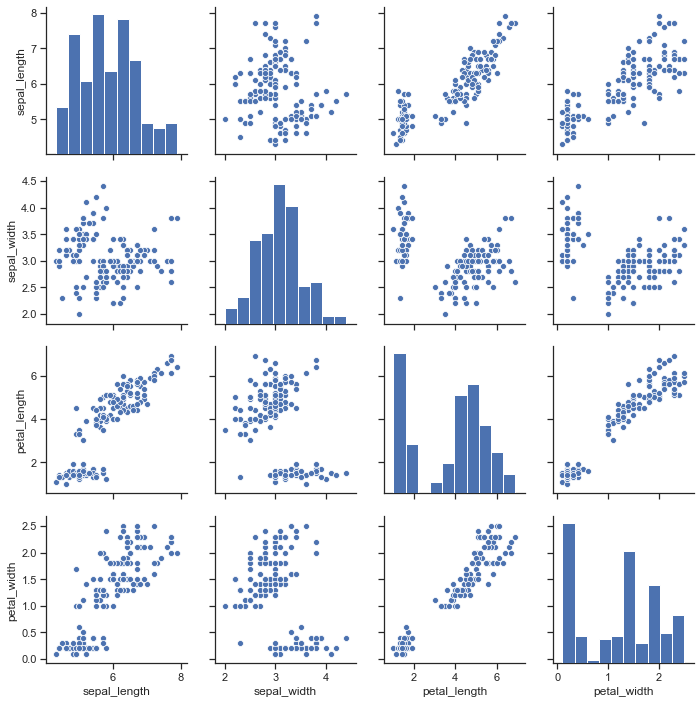

In [78]:
from sklearn.datasets import load_iris
import seaborn as sns
sns.set(style="ticks",color_codes =True)
iris= sns.load_dataset("iris")
#Ploting the pair plots for Iris dataset using Seaborn 
g = sns.pairplot(iris)

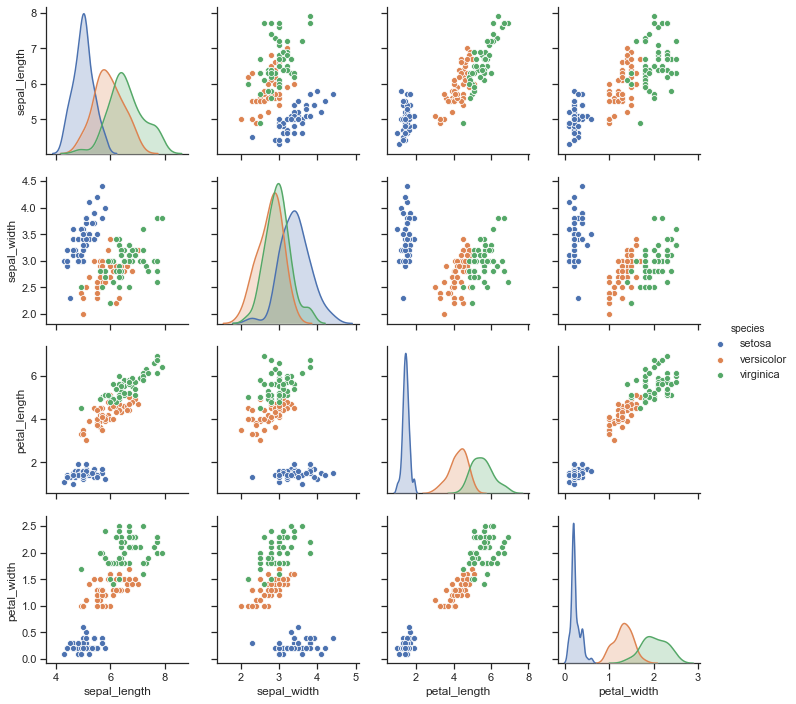

In [79]:
#Color Plot using hue 
g = sns.pairplot(iris, hue="species")

> From the scatter plot matrix, we can observe that they are histogram and scatter plots for all the dimensions. The histogram represents the self-data plots of the species. The upper and lower triangles from the diagonal represents the pair plots for different dimensions like sepal length vs sepal width, sepal length vs petal length and so on. By observation we can interpret that the upper and lower triangles from the diagonal are mirror images and hence they are 6 unique pair plots that defines the separability of the dimensions for 3 species. The 6 unique pairs are sepal length vs sepal width, sepal length vs petal length, sepal length and petal width, sepal width vs petal length, sepal width vs petal width and petal length vs petal width. The Setosa species in all 6 plots is significantly separated from the other two species. In 5 pair plots the versicolor and virginica are overlapped.

>To identify the 3 different species from each other the pair plot which has petal length vs petal width gives the estimation of the species. From the Petal Length and Petal with plot the following is the range of petal length is from [0,6] and petal width is [1,3]. In this plot all the species are significantly separated from each other, although there is a quite overlap between versicolor and virginica species. The Setosa species can be separated, when the petal width is [0,1] and petal length is [0,2]. The Versicolor Species can be defined when petal width is [1,2] and petal length is [2.5,5]. The Virginica overlapped and in the region of versicolor species hence it can be identified when the petal width range is [1.5, 2.5] and petal length range is [4,7].


<ol>
References:
    
<li>https://seaborn.pydata.org/generated/seaborn.pairplot.html</li>
<li>https://www.youtube.com/channel/UCnVzApLJE2ljPZSeQylSEyg</li> 

</ol>

# KNN Implementation

## Loading dataset

In [80]:
#initializing the X and y variables for spliting the data
from sklearn.datasets import load_iris
iris =load_iris() 
X=iris.data
y=iris.target

In [81]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#Spliting the Train validation data set into 60%-20% with random_state=42
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [82]:
scores={}

In [83]:
scores_list=[]

In [84]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
scores=metrics.accuracy_score(y_test,y_pred)
scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [85]:
scores

0.9666666666666667

In [86]:
scores1={}

In [87]:
scores1_list=[]

In [88]:
#Training the KNN model using Accuracy_score() on given Hyper parameters and find the mean accuracy for each K value 
kvalues=[1, 5, 10, 15, 20, 25, 30, 35] 
for i in kvalues:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_val)
    scores1[i]=metrics.accuracy_score(y_val,y_pred)
    scores1_list.append(metrics.accuracy_score(y_val,y_pred))

In [89]:
scores1

{1: 0.9,
 5: 0.9333333333333333,
 10: 0.9333333333333333,
 15: 0.9333333333333333,
 20: 0.9333333333333333,
 25: 0.9666666666666667,
 30: 0.9666666666666667,
 35: 0.9333333333333333}

Text(0, 0.5, 'Testing Accuracy')

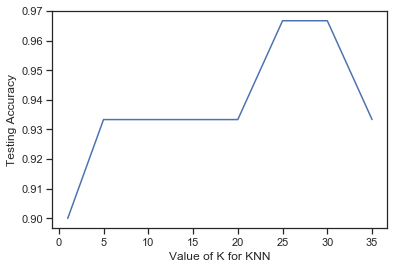

In [90]:
#Ploting the graph using obtained mean accuracies and Hyper parameter values of k using matplotlib  
import matplotlib.pyplot as plt
k=[1,5,10,15,20,25,30,35]
plt.plot(k,scores1_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

> The above graph illustrates the predicted accuracies obtained vs K_values for KNN model. We can observe that the Maximum Accuracy is obtained at values k=[25,30]. The values of k effects the noise and the distance from the data points. For smaller values of K, better performance is observed.As the k value increase , there is a decrease in accuracy prediction. Hence the best hyperparameter for KNN in case of the Iris dataset is k=25. 

In [91]:
scores2={}

In [92]:
scores2_list=[]

In [93]:
# Chosing the Best Hyperparameter to test the model on Test dataset
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
scores2[25]=metrics.accuracy_score(y_test,y_pred)
scores2_list.append(metrics.accuracy_score(y_test,y_pred))

print("The maximum accuracy obtained is {}".format(scores2_list))

The maximum accuracy obtained is [1.0]


> The Maximum accuracy obtained for KNN model for best hyperparameter K=25, is 100%

> 
<ol>
    References:
<li>https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e</li>
<li>https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn</li>
<li>https://scikit-learn.org/stable/modules/model_evaluation.html</li>
<li>https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75</li>


</ol>

# Support Vector Machine(SVM) Implementation

In [94]:
X=iris.data
y=iris.target

In [95]:
#Spliting the data set into Train_validation(80%) and test data set(20%) with random_state=42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [96]:
accuracy={}

In [97]:
score3_list=[]

In [98]:
#Finding the mean accuracy and best hyper parameters using the given Regulariztion(C) values
#and also using the 10 fold Cross validation to train and test the model for 80% of the train_val data set
Cvalues=[0.1,0.5,1,2,5,10,20,50]
for i in Cvalues:
    clf = SVC(C=i,kernel='linear',gamma='auto')
    clf.fit(X_train, y_train)
    clf.predict(X_test)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv = 10)
    score3_list.append(accuracy.mean())

In [99]:
score3_list

[0.9575757575757576,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9423076923076923,
 0.933974358974359]

Text(0, 0.5, ' Mean Testing Accuracy')

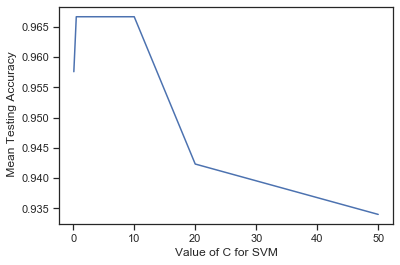

In [100]:
#Ploting the graph for C values and mean accuracy using matplotlib
import matplotlib.pyplot as plt
C=[0.1,0.5,1,2,5,10,20,50]
plt.plot(C,score3_list)
plt.xlabel('Value of C for SVM')
plt.ylabel(' Mean Testing Accuracy')

> The graph illustrates that for small values of C i.e.[0.1,0.5,1] the accuracy prediction is less and as the C values increased i.e. [2,5,10] there is an constant increase in accuracy for consequentive C values. Later, there is decrease in accuracy for higher values i.e.[20,50].The highest accuracy is observed for C=[2,5,10]. For small values of C, the model will look for large margin that seperates the hyper plane, even though it misses any classffication points and less noise effect is observed for smaller values.Hence C=2 is the best hyper parameter for SVM Classifier on Iris Dataset.

In [101]:
score4_list=[]

In [102]:
# Testing the model on test data based on best hyperparameters obtained from the graph

from sklearn import metrics
clf = SVC(C=2,kernel='linear',gamma='auto')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
score4_list.append(metrics.accuracy_score(y_test,y_pred))
print("The maximum accuracy obtained is {}".format(score4_list))

The maximum accuracy obtained is [1.0]


>The Maximum Accuracy for SVM Model for best hyperparameter C=2, is 100%

> 
<ol>
    References:
<li>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html</li>
<li>https://datascience.stackexchange.com/questions/23219/k-fold-cross-validation-algorithm</li>
<li>https://www.youtube.com/watch?v=gJo0uNL-5Qw</li>
<li>https://www.youtube.com/watch?v=6dbrR-WymjI</li>
<li>https://www.youtube.com/watch?v=TIgfjmp-4BA</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html</li>
<li>https://machinelearningmastery.com/k-fold-cross-validation/</li>


</ol>

# Tree-based Classifers

## Decision Tree Classifier

In [115]:
X=iris.data
y=iris.target

In [116]:
#Spliting the data set into Train_validation(80%) and test data set(20%) with random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [117]:
score5_list=[]

In [118]:
#Finding the mean accuracy and best hyper parameters using the given max_depth values
#and also using the 10 fold Cross validation to train and test the model for 80% of the train_val data set
max_depth=[3, 5, 10, None]
for i in max_depth:
    dtree = DecisionTreeClassifier(max_depth=i,random_state=42)
    dtree.fit(X_train, y_train)
    y_pred=dtree.predict(X_test)
    accuracy = cross_val_score(dtree, X_train, y_train, scoring='accuracy', cv = 10)
    score5_list.append(accuracy.mean())

In [119]:
score5_list

[0.9332167832167831, 0.908216783216783, 0.9248834498834497, 0.9248834498834497]

Text(0, 0.5, ' Mean Testing Accuracy')

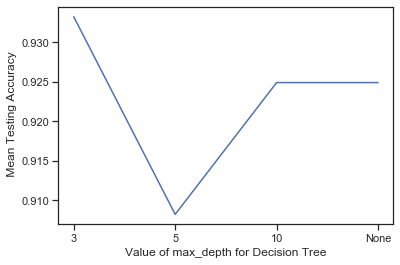

In [120]:
#Ploting the graph for max_depth values and mean accuracy using matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
D=["3","5","10","None"]
plt.plot(D,score5_list)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel(' Mean Testing Accuracy')

> The graph illustrates the predicted accuracy values vs the max_depth values of a Decision Tree. The predicted accuracy values are gradually decreasing as there is a increase in max_depth values, this is because the model overfits as the depth of the tree increases. Hence it is clearly evident that the best hyperparameter of the Decisiom tree - max_depth=3 for the Iris dataset

In [121]:
score6_list=[]

In [122]:
# Testing the model on test data based on best hyperparameters obtained from the graph
dtree = DecisionTreeClassifier(max_depth=3,random_state=42)
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
score6_list.append(metrics.accuracy_score(y_test,y_pred))
print("Maximum accuracy is {}".format(score6_list))

Maximum accuracy is [1.0]


> The Maximum accuracy obtained for Decision Tree for max_depth=3, is 100%

## Random Forest

In [123]:
X=iris.data
y=iris.target

In [124]:
#Spliting the data set into Train_validation(80%) and test data set(20%) with random_state=42
X_train ,X_test, y_train , y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [125]:
#Finding the mean accuracy and best hyper parameters using the given number of trees and  max_depth values
#also using the 10 fold Cross validation to train and test the model for 80% of the train_val data set

n_estimators=[5, 10, 50, 150, 200]
max_depth: [3, 5, 10, None]

for i in n_estimators:
    accuracy={}
    score7_list=[]
    for j in max_depth:
        rand_for= RandomForestClassifier(n_estimators=i,max_depth=j,random_state=42)
        rand_for.fit(X_train, y_train)
        rand_for.predict(X_test)
        accuracy=cross_val_score(rand_for,X_train,y_train,scoring='accuracy',cv=10)
        score7_list.append(accuracy.mean())
    
    
    print("Mean accuracy is {}".format(score7_list))

Mean accuracy is [0.9248834498834497, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497]
Mean accuracy is [0.9332167832167831, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497]
Mean accuracy is [0.9415501165501163, 0.9415501165501163, 0.9332167832167831, 0.9332167832167831]
Mean accuracy is [0.9415501165501163, 0.9332167832167831, 0.9248834498834497, 0.9248834498834497]
Mean accuracy is [0.9415501165501163, 0.9332167832167831, 0.9332167832167831, 0.9332167832167831]


In [126]:
#storing the n_estimator=5 and max_depth  values in score7_list1
score7_list1=[0.9248834498834497, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497]

In [127]:
#storing the n_estimator=5 and max_depth  values in score7_list2
score7_list2=[0.9332167832167831, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497]

In [128]:
#storing the n_estimator=5 and max_depth  values in score7_list3
score7_list3=[0.9415501165501163, 0.9415501165501163, 0.9332167832167831, 0.9332167832167831]

In [129]:
#storing the n_estimator=5 and max_depth  values in score7_list4
score7_list4=[0.9415501165501163, 0.9332167832167831, 0.9248834498834497, 0.9248834498834497]

In [130]:
#storing the n_estimator=5 and max_depth  values in score7_list5
score7_list5=[0.9415501165501163, 0.9332167832167831, 0.9332167832167831, 0.9332167832167831]

In [131]:
#Storing the values in a 5*4 matrix to plot the Heatmap plot
arr = np.array([score7_list1, score7_list2, score7_list3,score7_list4,score7_list5])
print(arr)

[[0.92488345 0.92488345 0.92488345 0.92488345]
 [0.93321678 0.92488345 0.92488345 0.92488345]
 [0.94155012 0.94155012 0.93321678 0.93321678]
 [0.94155012 0.93321678 0.92488345 0.92488345]
 [0.94155012 0.93321678 0.93321678 0.93321678]]


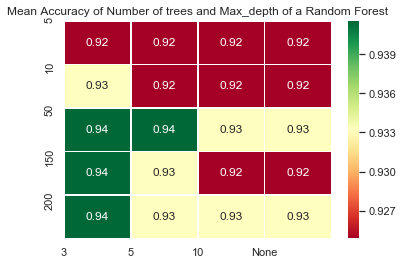

In [132]:
#using Seaborn heatmap, a graph plot with the values of number of trees and max_depth with mean accuracies 
#to obtain the best parameters for Random forest classifier
import seaborn as sns; sns.set()
import numpy as np
n_estimator=['5', '10', '50', '150', '200']
max_depth=['3', '5', '10', 'None']

ax=sns.heatmap(arr,annot=True,linewidth=0.5,cmap="RdYlGn",cbar="Mean Accuracy")
ax.set_xticks(np.arange(len(max_depth)))
ax.set_yticks(np.arange(len(n_estimator)))
ax.set_xticklabels(max_depth)
ax.set_yticklabels(n_estimator)
ax.set_title("Mean Accuracy of Number of trees and Max_depth of a Random Forest")
plt.show()


>For Random Forest Model, a Heatmap plot is plotted. The plot illustrates the predicted accuracy values on the Random Forest model for Number of Tree and Max_depth hyperparameters. The two parameters are the deciding factors for the Random Forest model. Here we can observe that they are plethora of highest accuracies obtained for higher values of Number of trees and lesser value of Max_Depth. This is because, the Number of trees increases, the more to learn about the data and for max_depth, the deeper the tree, it has more splits and more data is captured.However, to find the best hyperparameter for Random forest model we need to make sure that the model does not take a lot of time, by building more trees and should not overfit the model by increasing the depth. Hence the best Hyperparameters for Random Forest is n_estimators=50 and max_depth=3. 


In [133]:
score8_list=[]

In [134]:
#Testing the model using Test dataset using the best hyperparameters values of number of trees and max_depth
rand_for=RandomForestClassifier(n_estimators=50,max_depth=3,random_state=42)
rand_for.fit(X_train, y_train)
y_pred=rand_for.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
score8_list.append(metrics.accuracy_score(y_test,y_pred))
print("The maximum accuracy obtained is {}".format(score8_list))

The maximum accuracy obtained is [1.0]


>The Maximum accuracy obtained for Random Forest model for n_estimators=50 and max_depth=3, is 100%

## Gradient Boosting Classifier

In [135]:
X= iris.data
y=iris.target

In [136]:
#Spliting the data set into Train_validation(80%) and test data set(20%) with random_state=42
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
score9_list=[]

In [138]:
#Finding the mean accuracy and best hyper parameters using the given number of trees values
#also using the 10 fold Cross validation to train and test the model for 80% of the train_val data set

estimator=[5, 10, 50, 150, 200]
for i in estimator:
    gbt=GradientBoostingClassifier(n_estimators=i,random_state=42)
    gbt.fit(X_train,y_train)
    gbt.predict(X_test)
    accuracy=cross_val_score(gbt,X_train,y_train,scoring='accuracy',cv=10)
    score9_list.append(accuracy.mean())
    
print("The Maximum accuracy obtained is {}".format(score9_list))

The Maximum accuracy obtained is [0.9325757575757574, 0.9325757575757574, 0.9248834498834497, 0.9165501165501164, 0.9165501165501164]


In [139]:
score9_list

[0.9325757575757574,
 0.9325757575757574,
 0.9248834498834497,
 0.9165501165501164,
 0.9165501165501164]

Text(0, 0.5, ' Mean Testing Accuracy')

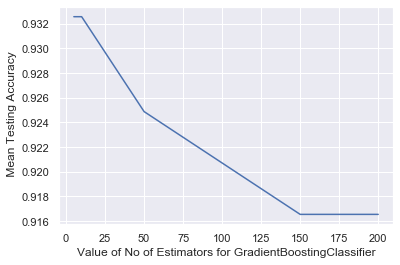

In [140]:
#Ploting the graph with obtained mean accuracies for corresponding number of trees values
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
E=[5, 10, 50, 150, 200]
plt.plot(E, score9_list)
plt.xlabel('Value of No of Estimators for GradientBoostingClassifier')
plt.ylabel(' Mean Testing Accuracy')

> The graph illustrates the predicted accuracy obtained vs the n_estimators of Gradient Boosting Classifier. The n_estimators defines the number of stages of the model. It is evident from the results of the graph that the for less number of stages, more accuracy is obtained. This is because the model overfits as the stages increases and less acuuracy is obtained. Hence the best Hyperparameters for Gradient Boosting Classifier is n_estimators=5 for the Iris dataset.

In [141]:
score10_list=[]

In [142]:
#Testing the model using test data using the best hyper-parameters values 
gbt=RandomForestClassifier(n_estimators=5,random_state=42)
gbt.fit(X_train, y_train)
y_pred=rand_for.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
score10_list.append(metrics.accuracy_score(y_test,y_pred))
print("Maximum accuarcy obtained is {}".format(score10_list))

Maximum accuarcy obtained is [1.0]


>The Maximum accuracy obtained for Gradient Boosting Classifier for n_estimator=5, is 100%

>
<ol>
References:
<li>https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d</li>
<li>https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html</li>
<li>https://www.datacamp.com/community/tutorials/decision-tree-classification-python</li>
<li>https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</li>
<li>https://scikit-learn.org/stable/modules/tree.html</li>
<li>https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html</li>
    
</ol>

# Analysis

## Why to split the dataset into train and test sets?

>In machine learning, the model learns from the given data and predicts the output by analyzing the data. It is important in machine learning that the model must perform well on new, previously unseen inputs, not only on which the model was trained. To do so, we separate the dataset into two, train dataset and test dataset. We fit the model on the training dataset and get the predictions on the data set. The model learns from the training dataset and we further test the model on the test dataset, in which the model is encountered with a new sample of data to predict, hence we can get the correct predictions of the data using the model. When we train and test the model of the same data, then the model will give the same results because the model is already trained on the data. Therefore we use separate datasets
<ol>
References:
    <li>http://www.deeplearningbook.org/contents/ml.html</li>
    <li> https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6</li>
    <li> https://www.youtube.com/watch?v=P2NqrFp8usY</li>
</ol>

##  Explanation on why when finding the best parameters for KNN you didn't evaluate directly on the test set and had to use a validation test

>In the KNN model, we train the hyperparameters on the model and the best one is selected. The hyperparameters are trained on the Validation dataset, a percentage of data from the training data set. Although the test data set is also a portion of the training dataset, we use the test set to only find the prediction of accuracy in this scenario or to estimate the generalization error (expected value of error on new input) of a learner after the learning process is complete. Hence test set is not used to find the choice of the model, including hyperparameters. To select the best hyperparameters of the model is trained of the Validation set which is a subset of the training data set

<ol>
    References:
<li>http://www.deeplearningbook.org/contents/ml.html</li>
</ol>

## What was the effect of changing k for KNN. Was the accuracy always affected the same way with an increase of k? Why this happened?

>In the KNN model, we have given various K-nearest neighbors parameter values to train the model on the validation set and get the best hyperparameters values of the model. The effect of the k values depends on the datapoints of the dataset and we can find by trial and error method. Although for smaller values of k can be a noisy and higher influence on the results, for larger values of k will have smoother decision boundaries which result in lower variance but increased bias and computationally expensive.  In the case of the Iris dataset, the k values [1, 5, 10, 15, 20, 25, 30, 35] are increased as the k values increased. For k=1 the accuracy is initially less and slightly increased as the k value is increased until k=30. As the k value increased to [25,30] the model has predicted more accuracy. This trend in the change in values of k is because the Euclidean  distance between two data points for small values of k we observed more accuracy and as the k values became high the accuracy decreased  Although as k=35 we can observe that the accuracy is decreased as the model could only get the data points as it is less for  value of ks e.g. [5,10, etc.]

<ol>
    References:
<li>https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e</li>

</ol>


## The relative effect of changing the max depths for decision tree and random forests? 

> The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.For both the models, we have similar max_depth values [3,5,10, None].In both Decision trees and Random forest, as the maximum depth is increased  the predicted accuracy values is gradually decreased because the trees grows until the criteria is reached and makes to overfit the data, leading to poor accuracy. The model overfits for large depth values. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data 

<ol>
    
   References:
<li>https://www.youtube.com/watch?v=ifTdlEMQ4X0</li>
<li>https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6</li>
<li>https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76</li>
<li>https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d</li>


</ol>

## A comment on the effect of the number of estimators for Gradient Tree Boosting and what was the relative effect performance of gradient boosting compared with random forest.


>The Gradient Boosting Classifier the number of estimators is defined as the number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting, so a large number usually results in better performance. In the case of Iris data set, we can observe from the plot that, the maximum accuracy is predicted when the n_estimators =5,10 and as the values increased the mean accuracy is gradually decreased. The Gradient Boosting Algorithm uses the Boosting technique, where the decision trees are performed sequentially, thereby learning the mistakes of the previous stages and given as an improved input to the next stage. 
Comparing The number of estimators in Gradient Boosting Classifier and Random Forest, the number of estimators in Random forest is the number of trees in a forest. The Random Forest uses the Bagging Technique. Hence, in the number of trees in the forest, we get a better prediction of accuracy to the algorithm. In this case of the Iris data set, we can observe that as the number of estimators is increased, the more the accuracy like [50,150,200] in Random Forest model.The Boosting technique is used in Gradient Boosting for a small number of Estimators, we have observed better accuracy values. The model has learned the mistakes of the previous stage and delivered a better performance at the initial stages. Hence we could see that the accuracy was deteriorating as the number of estimators increases.

<ol>
    
   References:
<li>https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/</li>
<li>https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab</li>

</ol>



## What does the parameter C define in the SVM classiffer? What was the effect observed and why this happened?

> The C parameter is the Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
The C parameter illustrates the SVM model to how much you want to avoid misclasffying each sample. The larger C values, the model will choose small-margin hyperplane, which does the classification correctly all training points. For small values of C, the model will look for large- margin seperating hyperplane even if the hyperplane misclassifies few data points. This is observed even if the training data is linearly seperable.
In the Iris data set scenario, we can observe that as the C values[0.5,1,2,5,10] are small, the accuracy of the model is more which means that there is less noise effect on the model and as the C values[20,50] are more the accuracy prediction is decreasing which implies that there is larger effect of noise. 

<ol>
    
   References:
<li>https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel</li>
<li>https://datascience.stackexchange.com/questions/4943/intuition-for-the-regularization-parameter-in-svm</li>

</ol>